In [33]:
from astropy_healpix import HEALPix
import astropy_healpix

import h5py
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import pairwise_distances

64800 (180, 360)


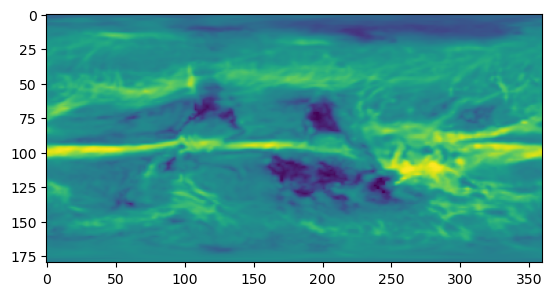

In [2]:
filename = "../data/Ytrain_1_3_small.h5"

h5 = h5py.File(filename, 'r')
Y1 = h5.get('Y1')[:]

print(Y1[0].size, Y1[0].shape)

plt.imshow(Y1[0])

In [3]:
for i in range(10):
    print('Power:', i, 'leads to', 12 * (4 ** i), 'points')

Power: 0 leads to 12 points
Power: 1 leads to 48 points
Power: 2 leads to 192 points
Power: 3 leads to 768 points
Power: 4 leads to 3072 points
Power: 5 leads to 12288 points
Power: 6 leads to 49152 points
Power: 7 leads to 196608 points
Power: 8 leads to 786432 points
Power: 9 leads to 3145728 points


In [4]:
power = 6
index = 12 * (4 ** power)

#hp = HEALPix(nside = 2 ** power, order='nested') # must be a power of 2
#hp.healpix_to_lonlat([index - 1, index]) # 12 at highest level

## convert data

In [5]:
def equiangle_to_healpix(arr, power = 6):
    hp = HEALPix(nside = 2 ** power, order='nested')
    lons, lats = hp.healpix_to_lonlat(range(index))
    
    lons = [int((360 / (2 * np.pi)) * x.radian // 1) for x in lons]
    lats = [int(180 * (0.5 + (x.radian / np.pi)) // 1) for x in lats]

    return arr[lats, lons]

y1_sphere = equiangle_to_healpix(Y1[0]).reshape(-1, 1)
y1_sphere.shape

(49152, 1)

## get hierarchy

In [6]:
def upsampling_one_level(power):
    """Returns adjacency matrix"""
    x = np.eye(12 * (4 ** power))
    return np.kron(x, np.ones((4, 1)))

def average_pooling_one_level(power):
    return upsampling_one_level(power).T / 4

average_pooling_one_level(1).shape, upsampling_one_level(1).shape

((48, 192), (192, 48))

## get adjacency -- this is wrong right now

Object `astropy_healpix.process_mask` not found.


In [42]:
power = 2

hp = HEALPix(nside = 2 ** power, order='nested')
x, y, z = hp.healpix_to_xyz(range(12 * (4 ** power)))
lons, lats = hp.healpix_to_lonlat(range(12 * (4 ** power)))

lats = [x.radian for x in lats]
lons = [x.radian for x in lons]

# everyone has 8 neighbors correct??
X = np.stack((x, y, z)).T
X.shape

(192, 3)

In [43]:
D = pairwise_distances(X)

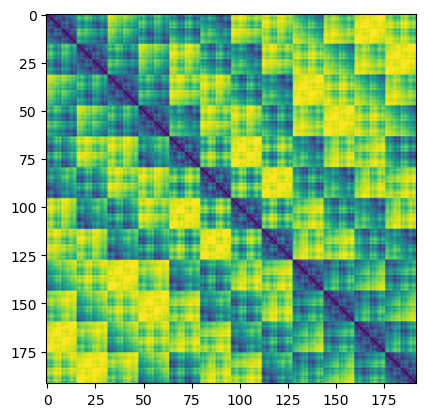

In [44]:
plt.imshow(D)

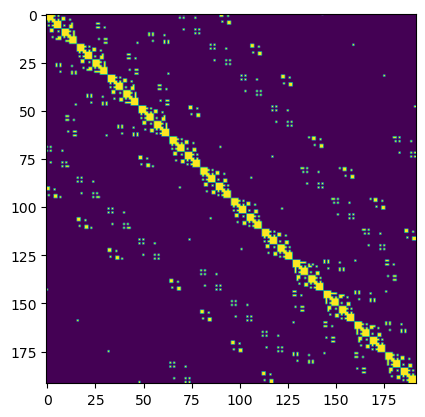

In [45]:
A = D <= np.sort(D, axis = 1)[:,(8)].reshape(-1, 1)
plt.imshow(A)

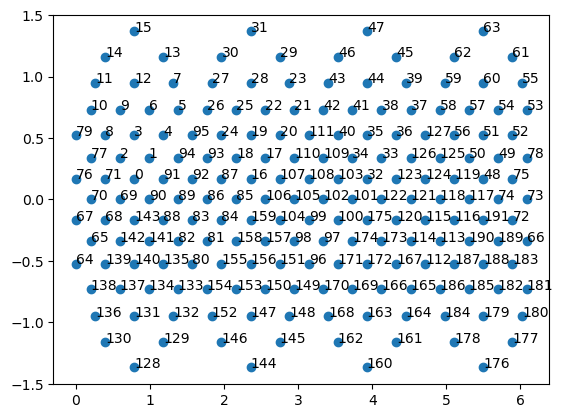

In [46]:
fig, ax = plt.subplots()
ax.scatter(lons, lats)

for i, txt in enumerate(range(192)):
    ax.annotate(txt, (lons[i], lats[i]))

In [50]:
np.arange(192)[A[160]]

array([128, 144, 145, 160, 161, 162, 163, 176, 178])